In [60]:
import matplotlib.pyplot as plt
import numpy as np


In [61]:
# Create data
np.random.seed(2)
mean=[[2,2],[4,2]]
cov=[[.2,.3],[.3,.2]]
N=20
X0=np.random.multivariate_normal(mean[0],cov,N).T
X1=np.random.multivariate_normal(mean[1],cov,N).T
print(X0.shape)
X=np.concatenate((X0,X1),axis=1)
y=np.concatenate((np.ones((1,N)),-1*np.ones((1,N))),axis=1)
#Xbar
X=np.concatenate((np.ones((1,2*N)),X),axis=0)
print(X.shape)
y.shape

(2, 20)
(3, 40)


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


(1, 40)

# With data *linearly separable*


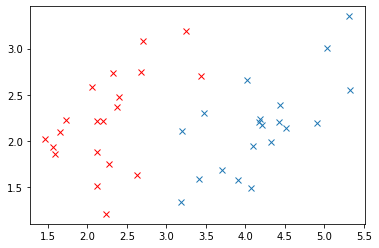

In [62]:
plt.plot(X[1,:N],X[2,:N],'xr')
plt.plot(X[1,N:2*N],X[2,N:2*N],'x')

# Build model
loss function: **J(w) = yi*w.T.xi**  
with i=1,..M, xi is a **missclassifier**

Algorithm **Stochastic Gradient Descent**

In [63]:
# if w.T*x >0 return 1
# if w.T*x =0 return 0
# if w.T*x <0 return -1
def h(w,x):
    return np.sign(w.T.dot(x))
# check y(calulate by w) is equal y 
def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y)
# main function 
def PLA(w_init, X, y):
    w=[w_init]
    miss_point=[]
    N=X.shape[1] 
    d=X.shape[0]
    while True:
        inds= np.random.permutation(N) # mix data
        for i in range(N):
            xi=X[:,inds[i]].reshape(d,1)
            yi=y[:,inds[i]]
            if h(w[-1],xi) !=yi: #missclassifier
                w_new = w[-1] + xi*yi
                w.append(w_new)
                miss_point.append(inds[i])
        if has_converged(X, y, w[-1]):            
            break
    return w,miss_point

In [64]:
w_init=np.random.randn(X.shape[0],1) # init w0
w,miss=PLA(w_init,X,y)
print('Index of miss point over loop: ',miss)
print('Solution: ', w[-1].T)

Index of miss point over loop:  [39, 18, 13, 20, 0, 33, 10, 5, 25, 15, 24, 11, 8, 36, 19, 39, 16, 33, 4, 5, 22, 15, 29, 17, 39, 8, 15, 36, 5, 29, 5, 1, 20, 15, 30, 9, 39, 19, 15, 36, 8, 33, 16, 39, 0, 5, 35, 17, 29, 14, 15, 28, 1, 24, 15, 33, 14, 15, 29, 5, 33, 19, 15, 29, 1, 38, 5, 5, 38, 17, 15, 29, 15, 39, 16, 33, 5, 15, 29, 5, 29, 5, 15, 29, 1, 26, 15, 33, 1, 29, 8, 15, 38, 17, 5, 33, 1, 29, 8]
Solution:  [[ 16.81053074 -14.61785935  13.8617152 ]]


In [65]:
# predict
x0=np.array([1,4,1.5])
h(w[-1],x0)

array([-1.])

# With data *none linearly separable*

Find the dividing line (f(X)=w.T*X) so that the numbers of miss point is smallest ( possible)

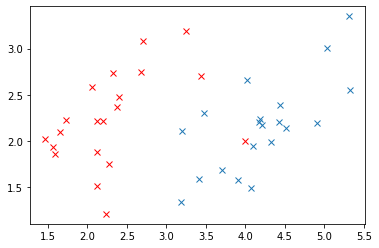

In [66]:
X[1,15]=4
X[2,15]=2
y[:,15]=1
plt.plot(X[1,:N],X[2,:N],'xr')
plt.plot(X[1,N:2*N],X[2,N:2*N],'x')

Algorithm **Stochastic Gradient Descent**

In [67]:
# if w.T*x >0 return 1
# if w.T*x =0 return 0
# if w.T*x <0 return -1
def h(w,x):
    return np.sign(w.T.dot(x))
def PLA(w_init, X, y,n): # n: numbers of loop
    w=[w_init]
    w_best=w # store best solution
    miss_point=[]
    N=X.shape[1]
    d=X.shape[0]
    l=[X.shape[1]] # list store number of miss point each loop. l[0] = numbers of point (all point is miss)
    count=0 # iterater
    while count<n:
        count+=1
        temp=len(miss_point) # all misspoints ( from iterater 0 to (count-1))
        inds= np.random.permutation(N) # mix data
        for i in range(N):
            xi=X[:,inds[i]].reshape(d,1)
            yi=y[:,inds[i]]
            if h(w[-1],xi) !=yi: #missclassifier
                w_new = w[-1] + xi*yi
                w.append(w_new)
                miss_point.append(inds[i])
        count_miss=len(miss_point)-temp # number of misspoints in iterater count
        if count_miss< min(l): #best number of misspoints
            w_best=w[-1]
        l.append(count_miss)
    return miss_point,l, w_best

In [68]:
w_init=np.random.randn(X.shape[0],1)
miss,l,w_best=PLA(w_init,X,y,40) #  40 iteraters
print('Index of miss point over loop: ',miss)
print('List numbers of miss point over loop: ',l)
print('Best numbers of miss point: ', min(l))
print('Solution: ', w_best.T)

Index of miss point over loop:  [36, 11, 8, 32, 10, 2, 20, 12, 26, 16, 39, 9, 25, 18, 5, 21, 15, 38, 1, 15, 37, 1, 26, 17, 29, 19, 5, 34, 8, 29, 1, 39, 15, 30, 5, 15, 25, 39, 1, 39, 17, 15, 33, 1, 29, 15, 39, 5, 33, 17, 29, 13, 15, 30, 5, 36, 19, 29, 2, 15, 31, 15, 33, 5, 39, 15, 37, 5, 15, 21, 1, 39, 5, 38, 14, 15, 21, 17, 33, 1, 29, 14, 39, 8, 15, 22, 39, 8, 5, 32, 16, 15, 27, 33, 1, 29, 17, 1, 39, 5, 38, 19, 1, 30, 5, 33, 16, 15, 29, 39, 17, 5, 39, 15, 36, 1, 24, 15, 38, 19, 15, 36, 5, 29, 8, 15, 32, 1, 38, 17, 15, 35, 5, 33, 15, 33, 5, 15, 32, 1, 15, 39, 26, 5, 29, 15, 39, 17, 15, 28, 15, 26, 15, 36, 5, 29, 1, 39, 15, 33, 1, 29, 5, 15, 33, 15, 30, 15, 22, 29, 17, 15, 31, 1, 33, 1, 33, 5, 15, 21, 15, 39, 39, 15, 15, 36, 39, 17]
List numbers of miss point over loop:  [40, 14, 5, 10, 6, 4, 6, 5, 4, 7, 3, 4, 4, 8, 6, 11, 5, 3, 5, 4, 6, 5, 2, 5, 3, 4, 5, 3, 3, 2, 3, 5, 4, 1, 2, 4, 4, 5, 2, 2, 4]
Best numbers of miss point:  1
Solution:  [[ 20.24821292 -14.27392981  11.89372578]]
